# TensorFlow tutorial

Learning the basics by following the quickstart guide from `https://www.tensorflow.org/tutorials/quickstart/beginner`.

THe dataset used here is the `mnist` dataset of handwriten digits.

`X` = handwriten digits<br>
`y` = actual values depicted in the digits

In [3]:
!export TF_ENABLE_ONEDNN_OPTS=0

In [4]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.14.0


In [7]:
# Load the MNIST dataset for handwritten digits
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [8]:
x_train.shape

(60000, 28, 28)

In [11]:
type(x_train)

numpy.ndarray

In [22]:
x_train[0]
x_train.dtype

dtype('uint8')

In [48]:
y_train.shape # Contains the true number writen

(60000,)

## Visualize the data

In [87]:
len(x_test[0])

28

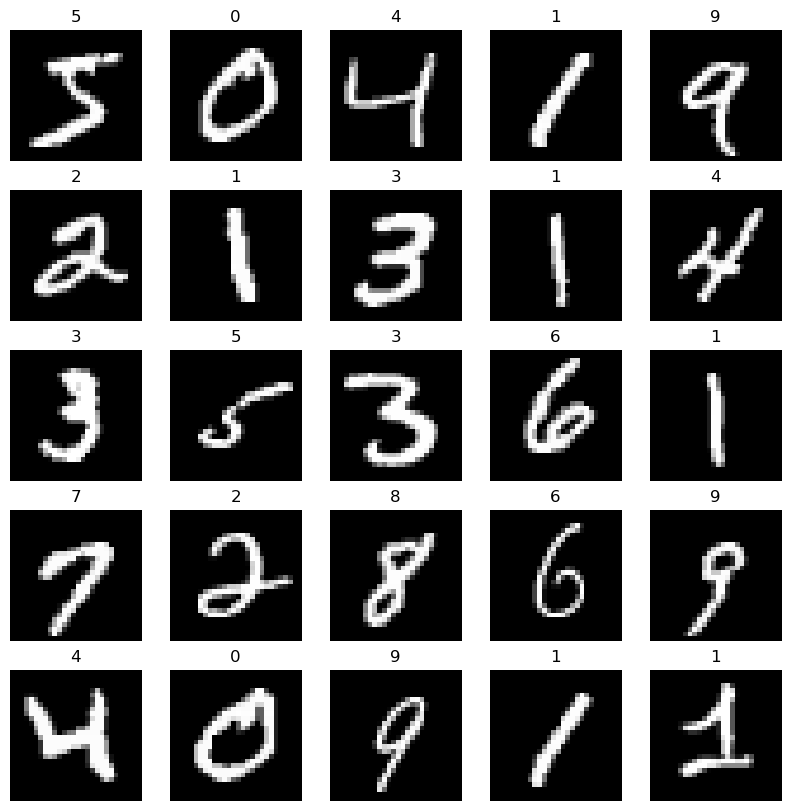

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=5, ncols=5, layout="constrained")
fig.set_size_inches(8, 8)
axsf = axs.flatten()

for i in range(len(axsf)):
    axsf[i].set_title(y_train[i])
    axsf[i].axis("off")
    axsf[i].imshow(x_train[i], cmap="gray")

In [23]:
# Normalize data [0-1] and convert to float
x_train, x_test = x_train / 255.0, x_test / 255.0

In [24]:
x_train.dtype

dtype('float64')

In [25]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Build a sequential model.

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

**Sequential models** have one input `tensor` and one output `tenesor`.

`tensors`: multi-dimensional arrays - like `numpy` arrays
- are immutable

In [35]:
# Basic tensor
print(tf.constant([[1, 2],
                   [3, 4],
                   [5, 6]], dtype=tf.float16))

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


This models uses `Flatten`, `Dense` and `Dropout` layers.

**Model layers**
`Flatten` : makes the input array flat - single row with elements<br>
`Dense` : creates an interconnected NN - deep learning<br>
    - `relu`: activation function - returns max(0, x) where x is the value in the tensor<br>
`Dropout` : layer which prevents overfitting

The model returns logits which need to be converted to probabilities using the `softmax()` function.

In [39]:
foo = tf.constant([-10, -5, 0.0, 5, 10], dtype = tf.float32)
tf.keras.activations.relu(foo).numpy()

array([ 0.,  0.,  0.,  5., 10.], dtype=float32)

## Compile the model

In [51]:
model.compile(optimizer="adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])

Because the model returns logits, we set the loss function to calculate the loss using logits as well.

```
The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.
```

There are many optimizer alrogithms, here we're using adam https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

In [156]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train and evaluate

In [230]:
model.fit(x_train, y_train, epochs=5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0192 - accuracy: 0.9942
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0174 - accuracy: 0.9939
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0168 - accuracy: 0.9942
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0165 - accuracy: 0.9939
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0149 - accuracy: 0.9951


In [231]:
x_test.shape # 10K images of handwriten digits

(10000, 28, 28)

In [232]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.1082 - accuracy: 0.9819 - 182ms/epoch - 583us/step


[0.10819070786237717, 0.9818999767303467]

Make the model return probabilities for each handwriten digit. That means that each cell in the array will corresponds to the probability of that number being depicted in the image.

In [233]:
probability_model = tf.keras.Sequential([model,
                                       tf.keras.layers.Softmax()])

In [234]:
predictions = probability_model(x_test[:100])

In [235]:
max(probability_model(x_test[:5])[1]), tf.argmax(probability_model(x_test[:5])[1]), len(probability_model(x_test[:5])[1])

(<tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 10)

In [236]:
y_test[3]

0

In [237]:
import numpy as np
predictions.numpy()

array([[2.08821870e-18, 2.35813946e-21, 9.28058425e-15, 2.89190560e-09,
        2.08553761e-24, 6.20140137e-16, 4.52951092e-35, 1.00000000e+00,
        5.12565759e-14, 1.18750912e-11],
       [5.90361798e-13, 1.40270694e-11, 1.00000000e+00, 1.47240586e-12,
        0.00000000e+00, 4.58791906e-14, 3.06197992e-13, 5.13164074e-38,
        3.58103067e-14, 2.61998258e-33],
       [5.40053055e-21, 9.99999642e-01, 1.53538959e-09, 7.77049378e-13,
        9.24776315e-12, 1.20553264e-12, 3.00265438e-11, 2.27870302e-07,
        1.33590873e-07, 1.35023132e-18],
       [1.00000000e+00, 2.49947511e-22, 2.22112620e-10, 9.05667149e-17,
        1.46683207e-10, 1.93429948e-13, 7.51842824e-11, 7.44195439e-15,
        2.81830361e-18, 4.11615519e-10],
       [3.57775434e-17, 2.81274593e-25, 1.07648560e-15, 7.05684389e-20,
        9.99982595e-01, 5.15654106e-19, 2.34681676e-22, 2.98383043e-08,
        1.21831749e-20, 1.73532408e-05],
       [8.48068236e-22, 9.99999881e-01, 3.24032613e-16, 3.54603620e-16,
   

In [238]:

np.sum(predictions[2])

1.0

### Visualize the results

In [239]:
index = 1
max_pred_index = np.argmax(predictions[index])
pred_prob = np.max(predictions[index])
pred_number = max_pred_index
true_value = y_test[index]

print(f"Predicted: predictions[{index}]={pred_number} with certainty: {pred_prob*100:.2f}%\nTrue value: {true_value}")

Predicted: predictions[1]=2 with certainty: 100.00%
True value: 2


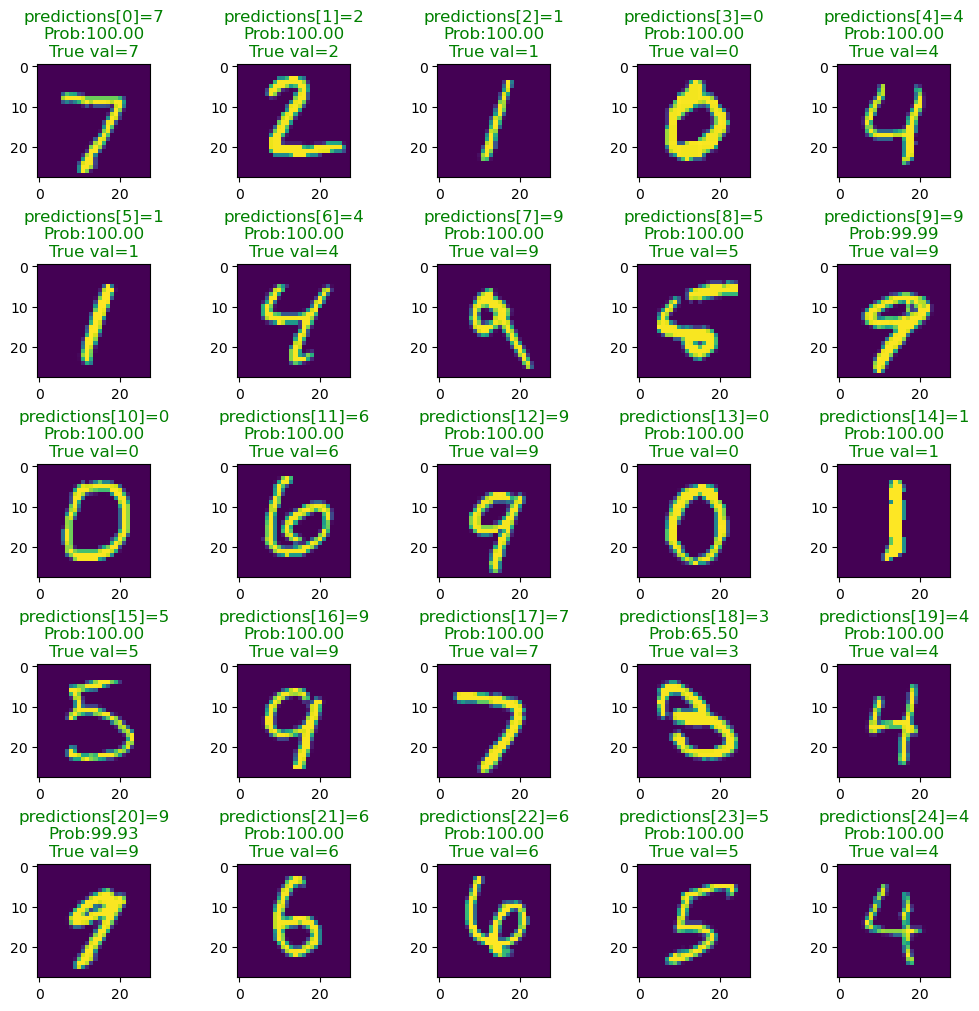

In [240]:
fig, ax = plt.subplots(nrows=5, ncols=5, layout="constrained")
axf = ax.flatten()
fig.set_size_inches(10, 10)

for i in range(len(axf)):
    max_pred_index = np.argmax(predictions[i])
    pred_prob = np.max(predictions[i])
    true_value = y_test[i]
    
    if max_pred_index == y_test[i]:
        c = "green"
    else:
        c = "red"
    
    axf[i].imshow(x_test[i])
    axf[i].set_title(f"predictions[{i}]={max_pred_index}\nProb:{pred_prob*100:.2f}\nTrue val={y_test[i]}",
                    color=c)

---